# Lance Guard: Data Cleaning and Feature Selection

First we import the packages we need for the project.

In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 6)
import numpy as np
import matplotlib.pyplot as plt
import json
from types import SimpleNamespace as Namespace

Populating the interactive namespace from numpy and matplotlib


Read the json files and parse it.

In [2]:
file_directory = '../../data/Pin hole tip.json'

# Pin hole tip.json 
# Scallop tip.json


json_data=open(file_directory).read()

# print(json_data[:100])

x = json.loads(json_data, object_hook=lambda d: Namespace(**d))
print(len(x.data))
# print(x.data[100].event.content)

76360
[-0.9916220903396606, -0.031881995499134064, -0.01417229138314724, 1510840155321]


mean: -0.998357902405


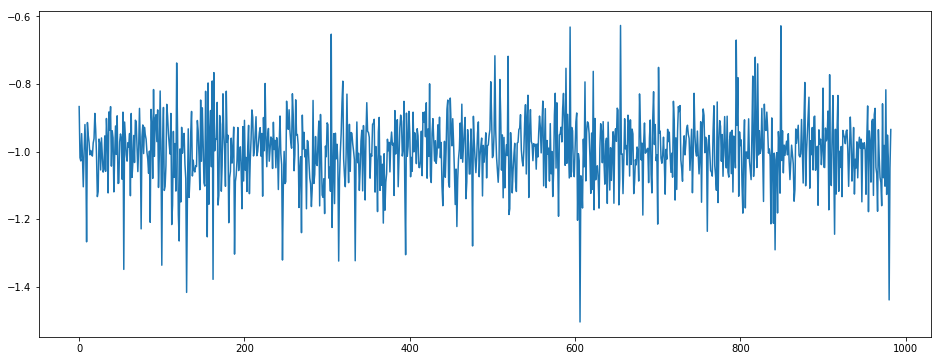

In [37]:
xRow = list()
start = 6000
limit = 8000 #len(x.data)
variable = 'quaternion' #quaternion acceleration
for index in range(start,limit):
#     print(x.data[index].event.variable == 'acceleration')
    if(x.data[index].event.variable == 'acceleration'):#quaternion
        xRow.append(x.data[index].event.content[0])
        
mean = sum(xRow)/len(xRow)
print('mean:', mean)
    
    
plt.plot(range(0,limit if len(xRow)>limit else len(xRow)), xRow[:limit], '-')

mean: -0.0288861356763


In the graph it can show some interesting patterns. Based on the waves there should be some interesting things coming out.


#### In this file, the json data from the accelerometer data will be preprocessed in the folloing ways:

1.Define size of window = 1, only use the acceleration data (x, y, z) of a paticular timestamp as a 

2.Define size of window = n, use the acceleration data (x, y, z) of a paticular timestamp, and some features in the window. 

3.Define size of window = n(x, y, z, drain?).

4.All of them above 

#### From the papers and the question itself, 3 types of algorithms can be used:
(1) Geometric based algorithms: KNN, SVM ...

(2) Probablistic based algorithms: GMM

(3) Time-series based algorithms: HMM

Hidden Markov Model could be a good choice. It is widely used in time series voice data processing.However it needs more data on the transition between states during the time, for example, in smart band data mining, it is the transition between human running, walking and cycling. In our dataset it is hard to get. More research is needed for this problem. 

### First, let's try to use the easiest one: size of window = 1
This can be implemented as a classification problem to deal with.

The first step is to label the data for each file.

We labeled the normal tip as 0, the tip with hole as 1, the scallop tip as 2.

Also we tried to label the normal tip as 0, and the other tips as 1.

The code is written in python and can only run in python3.

The result is shown in the following screenshots.

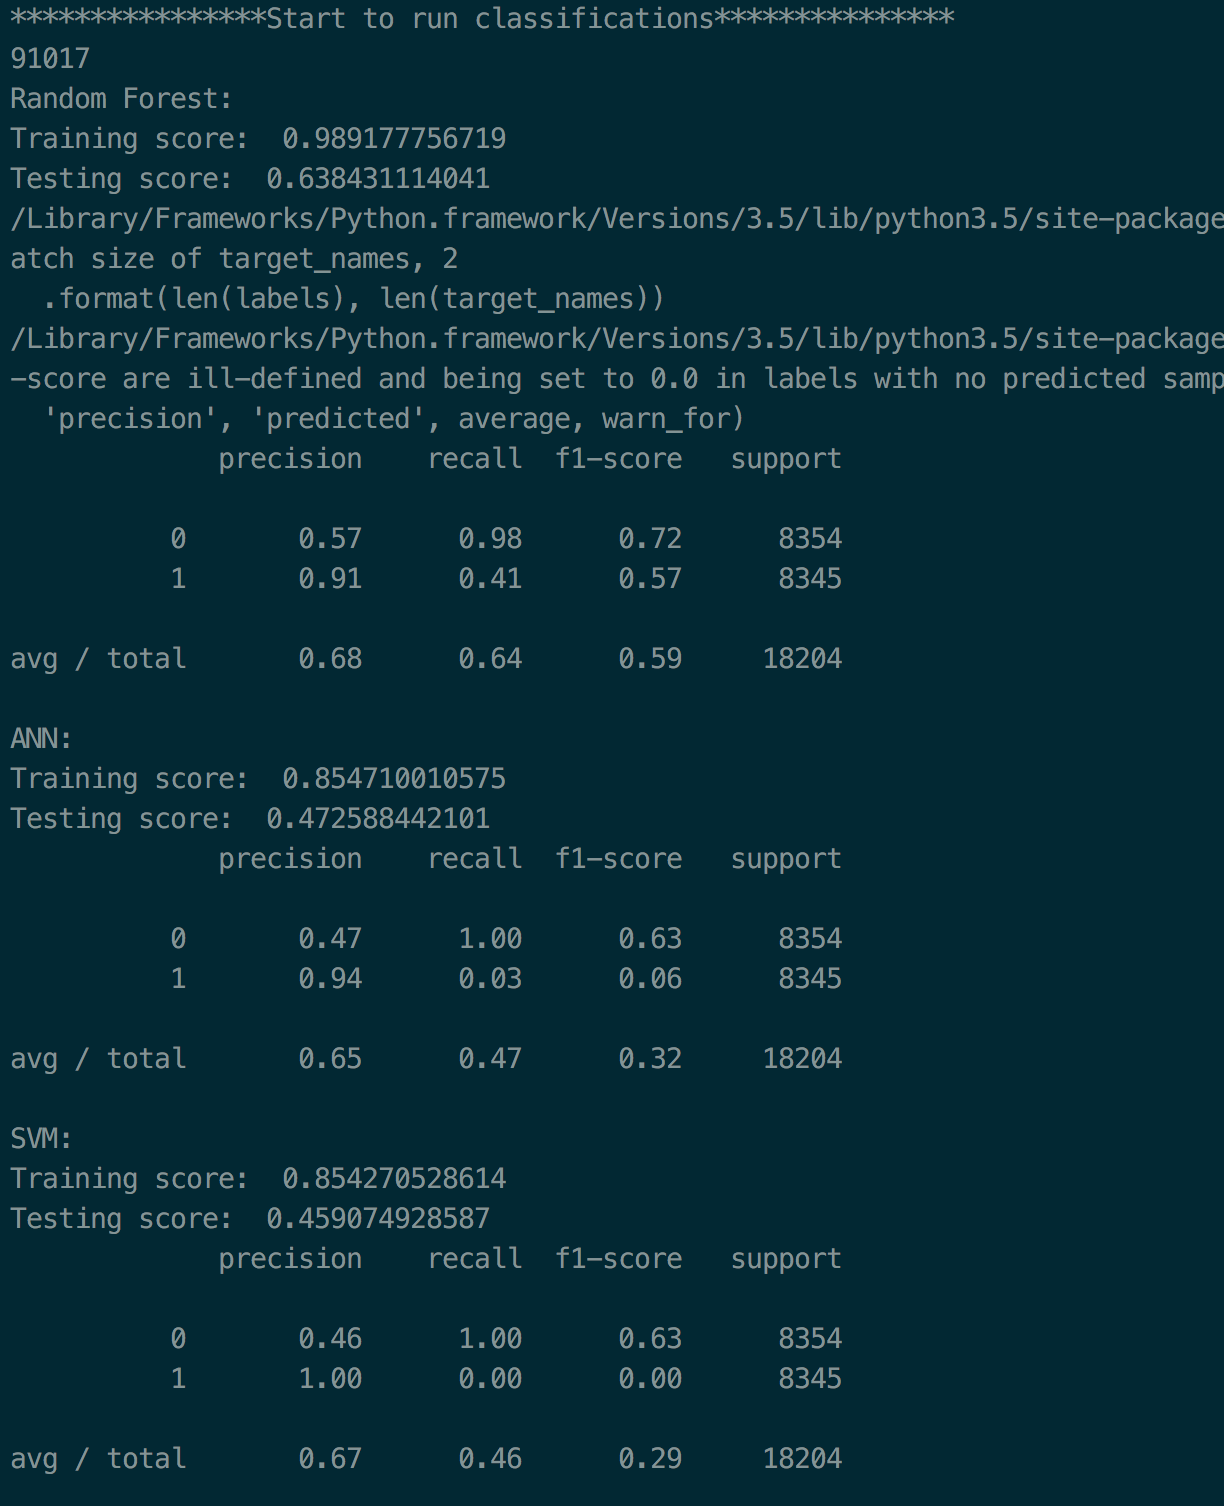


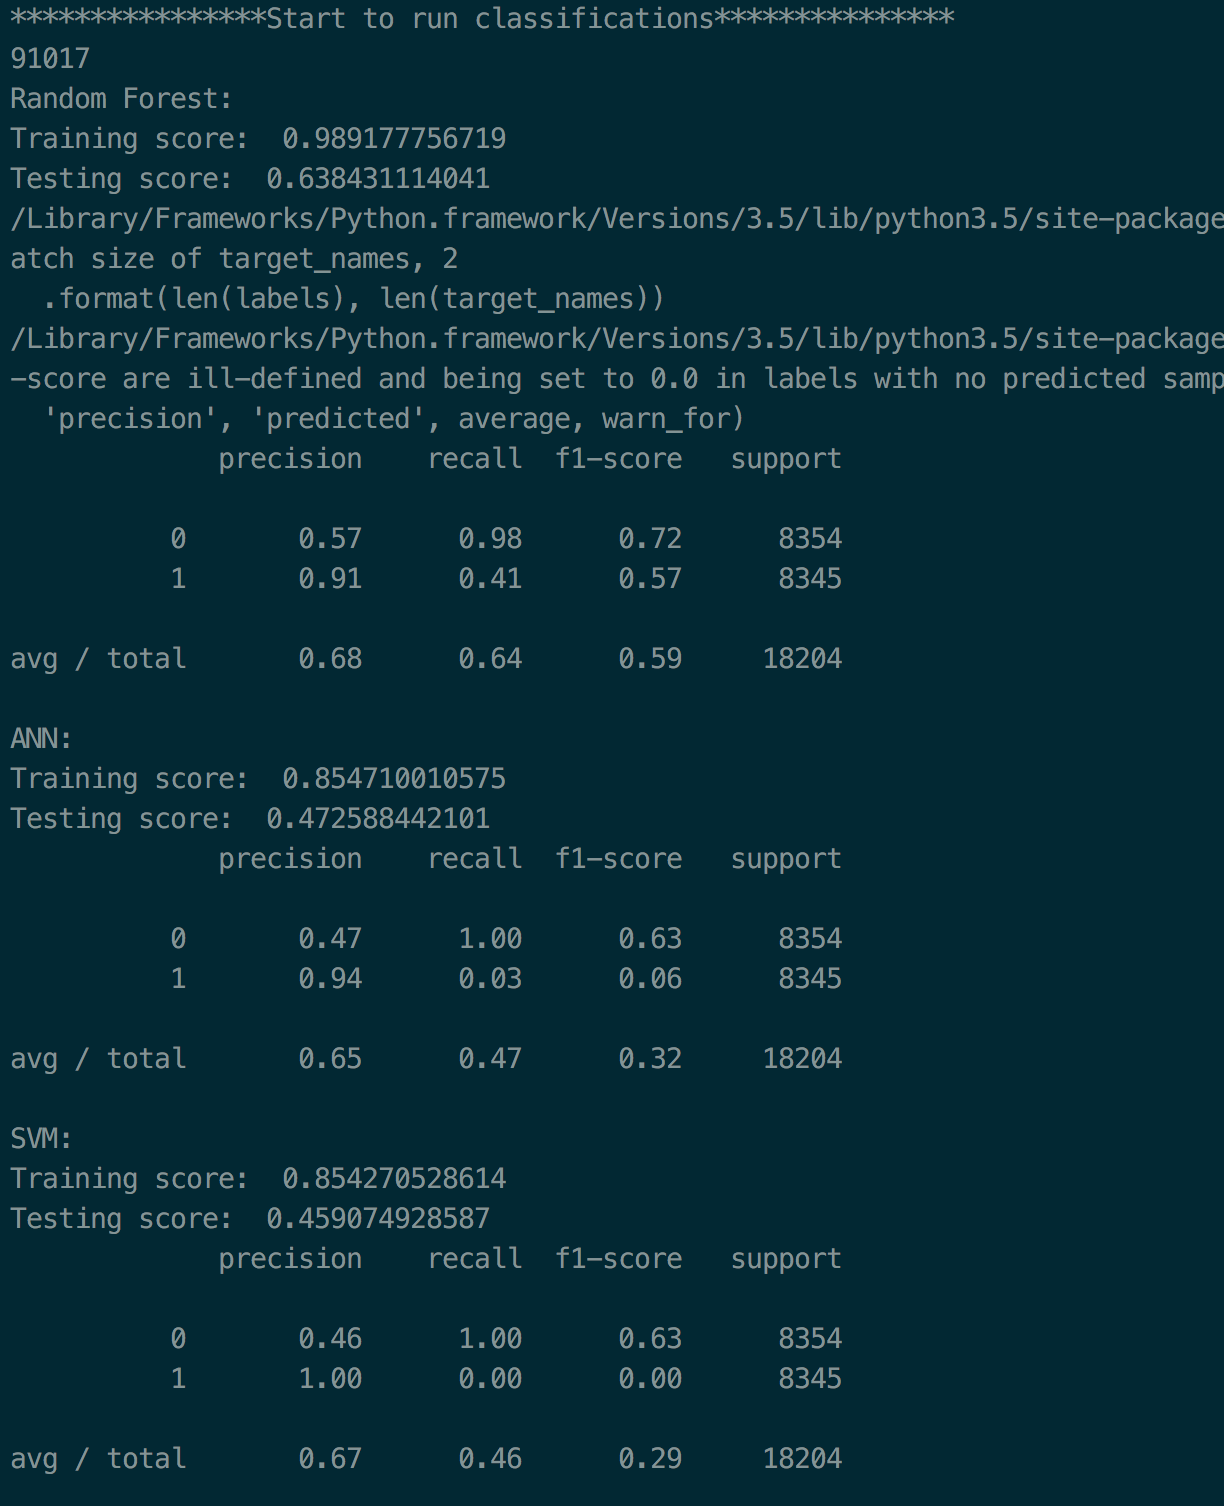


As we can see, the algorithms has difference in the result.However, Random Forest shows the best performance in all of them.

Also, the algorithms seems to be failed to identify the scallop tips, which may because the lack of data? Or the algorithms actually cannot see its patterns? Do we need to classify between different tips or we only need to classify normal/abnormal tips?

